# Predicting Type of Wine: RED or WHITE

This project is to predict the type of wine, red or white, using the following attributes:

* Fixed acidity. The predominant fixed acids in wine, such as tartaric, succinic, citric, and malic acids.
* Volatile acidity. The high acetic acid present in wine, which causes an unpleasant vinegar taste.
* Citric acid. A weak organic acid used to increase the freshness and flavor of wine.
* Residual sugar. The amount of sugar left after fermentation.
* Chlorides. The amount of salt in wine.
* Free sulfur dioxide. SO2 is used for preventing wine from oxidation and microbial spoilage.
* Total sulfur dioxide. The amount of free and bound forms of SO2.
* Density. Depends on the alcohol and sugar content.
* pH. Used to check the level of acidity or alkalinity of wine.
* Sulfates. An antibacterial and antioxidant agent added to wine.
* Alcohol. The percentage of alcohol in wine.


In [9]:
import pandas as pd

from sklearn.metrics import (accuracy_score,
                             roc_curve,
                             ConfusionMatrixDisplay,
                             confusion_matrix,
                             auc,
                             classification_report)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


#Set theme for plots.
sns.set_theme(style='dark')

In [10]:
url = 'http://localhost/webscraping/practice/'
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

files = ['RedWine.csv', 'WhiteWine.csv']
# files = ['winequality-red.csv', 'winequality-white.csv']

def wrangle(file):
    df = pd.read_csv(file, sep=';')   
    return df

df = [wrangle(url + file) for file in files]

df[0]['type'] = 'red'
df[1]['type'] = 'white'

In [11]:
display(
    df[0].head(),
    df[1].head()
)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [12]:
df_wine = pd.concat([df[0], df[1]], ignore_index=True)

In [13]:
df_wine.drop(columns='quality', inplace=True)
df_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,white


In [14]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


In [15]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [16]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [17]:
df_wine.type.nunique()

2

# Data Exploration 

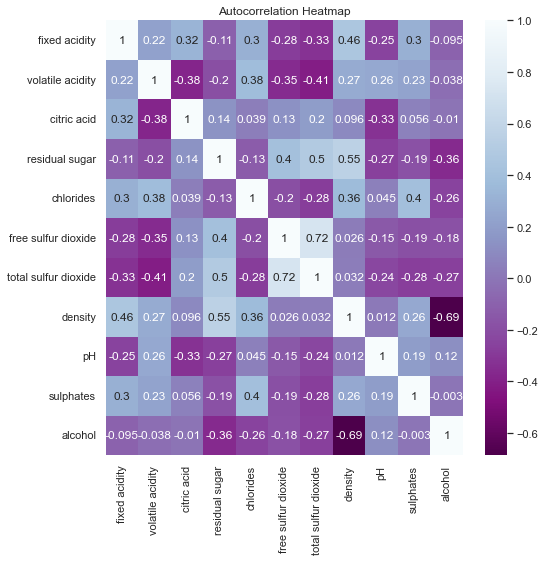

In [18]:
figure = plt.figure(figsize=(8,8))
corr = df_wine.corr()
sns.heatmap(corr,annot=True,cmap='BuPu_r')
plt.title('Autocorrelation Heatmap');

white    0.753886
red      0.246114
Name: type, dtype: float64

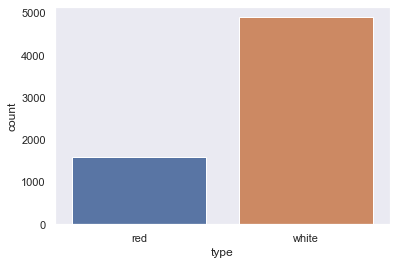

In [19]:
sns.countplot(data=df_wine,x='type');
df_wine.type.value_counts(normalize=True)

We have more of the white wine than red wine.

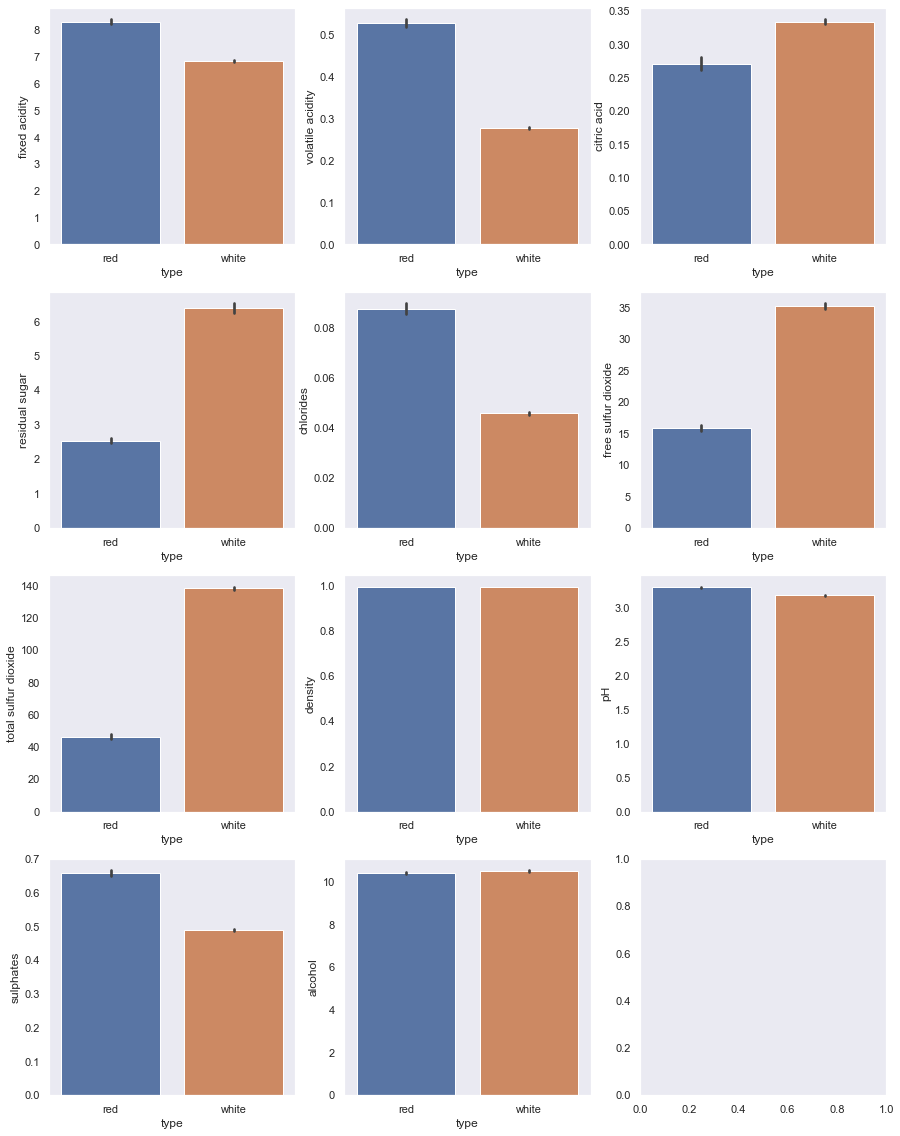

In [20]:
figure, axes = plt.subplots(int(len(df_wine.columns[:-1])/3 + 1),3,figsize=(15,20))
axes_ = [[i,k] for i in range(6) for k in range(3)]
for index, column in enumerate(df_wine.columns[:-1]):
    sns.barplot(data=df_wine, y=column, x='type', ax=axes[axes_[index][0],axes_[index][1]])
    ax = axes[axes_[index][0],axes_[index][1]].axes

**Acidity**: Redwines have relatively more fixed and a lot of volatile acidity than white wines.

**Residual Sugar**: Residual Sugar is the sugar left in wine after alcoholic fermentation is done. The more the residual sugar the sweeter the wine and from our analysis we see that on average white wine is sweeter as we would expect.

**Sulfur dioxide**: We see that white wine has more sulfur dioxide than redwine This is because white wines require higher levels of it due to their low acidity and susceptibility to oxidation.

**Chlorides**: We can see that red wine has more chloride than white wine this is due to redwines being fermentated with skins thus increasing chloride ions.

**Sulpahtes**: Red wines have more sulphates than white wines.

**Citric Acid**: White wines have more citric acid.

**pH**: White wines tend to be relatively more acidic than white wines.

**Alcohol**: Alcohol in both wines is almost the same.


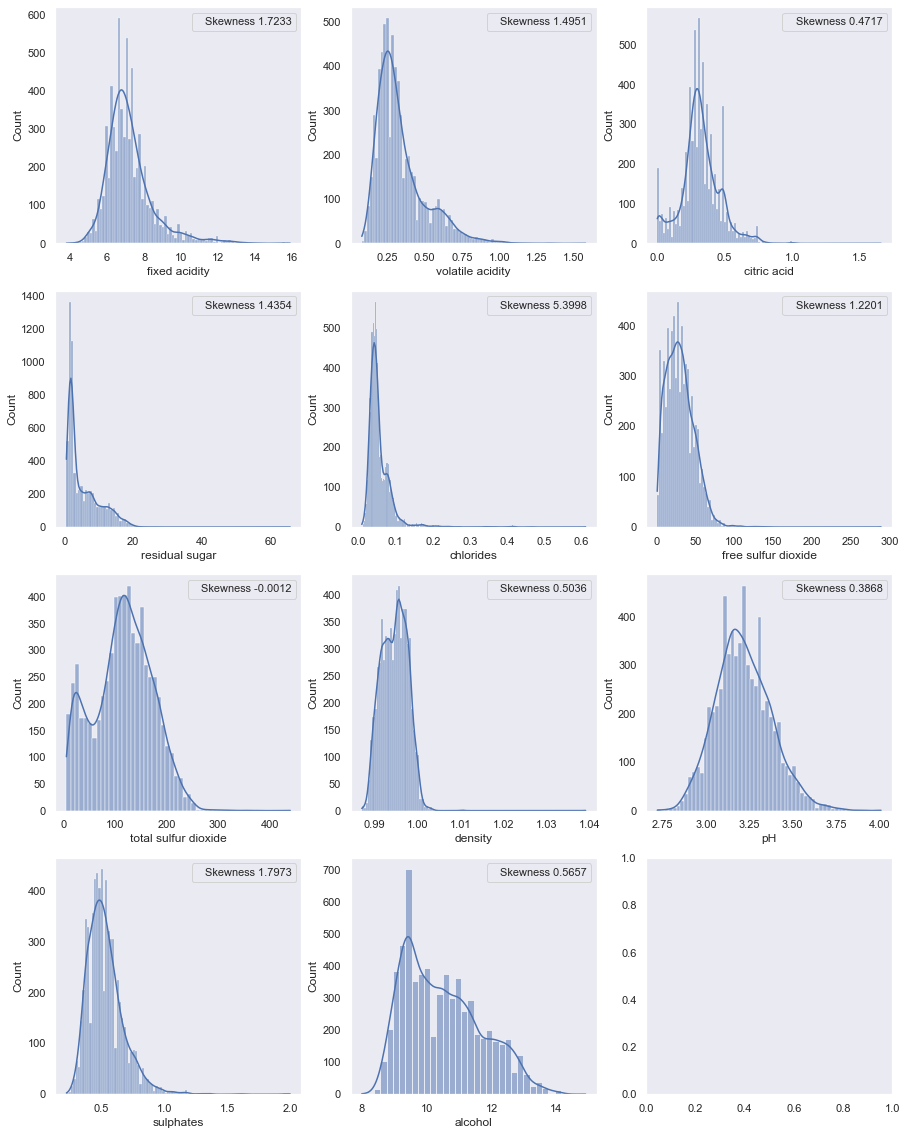

In [21]:
figure, axes = plt.subplots(int(len(df_wine.columns[:-1])/3 + 1),3,figsize=(15,20))
axes_ = [[i,k] for i in range(6) for k in range(3)]
for index, column in enumerate(df_wine.columns[:-1]):
    sns.histplot(data=df_wine, x=column, kde=True, ax=axes[axes_[index][0],axes_[index][1]])
    axes[axes_[index][0],axes_[index][1]].legend(labels=[f"Skewness {round(df_wine[column].skew(), 4)}"],handlelength=0)

Most of our data is highly skewed.

# Split

## Preprocessing

In [22]:
mms = MinMaxScaler()
df_scaled = pd.DataFrame(mms.fit_transform(df_wine.drop(columns='type')))
df_scaled.columns = df_wine.columns[:-1]

In [23]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


In [24]:
X = df_scaled
y = df_wine['type']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Build Model

## Baseline Model

In [26]:
#Implementing zero rule classifier as our baseline.
def zero_rule_algo(train, test):
    output_values = [row for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted

predictions = zero_rule_algo(y_train, y_test)
score = accuracy_score(y_test,predictions)

print(f'Accuracy score for our baseline model is {round(score * 100, 4)}')

Accuracy score for our baseline model is 73.7692


## Iterate 

In [27]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
predictions = DTC.predict(X_test)

score = accuracy_score(y_test, predictions)

print(f'Accuracy score for our baseline model is {round(score * 100, 4)}')

Accuracy score for our baseline model is 98.3846


In [28]:
# Print classification report
report = pd.DataFrame(classification_report(y_test, predictions, output_dict=True))
report.T

,precision,recall,f1-score,support
red,0.967836,0.970674,0.969253,341.000000
white,0.989562,0.988530,0.989045,959.000000
accuracy,0.983846,0.983846,0.983846,0.983846
macro avg,0.978699,0.979602,0.979149,1300.000000
weighted avg,0.983863,0.983846,0.983854,1300.000000


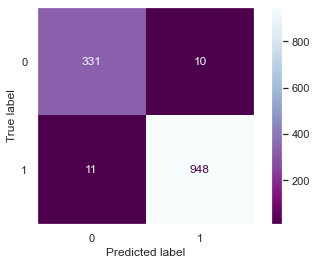

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot(cmap='BuPu_r');

# Evaluate

In [30]:
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr,tpr, label=f"ROC Curve (AUC = {round(auc(fpr,tpr), 4)})")
    plt.legend(handlelength=0)

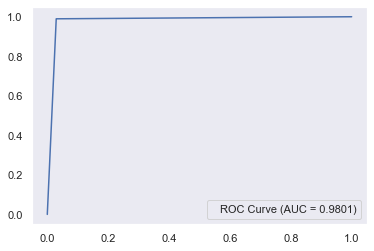

In [32]:
pred = [1. if i == 'white' else 0 for i in y_test]
plot_roc_curve(pred, DTC.predict_proba(X_test)[:,1])

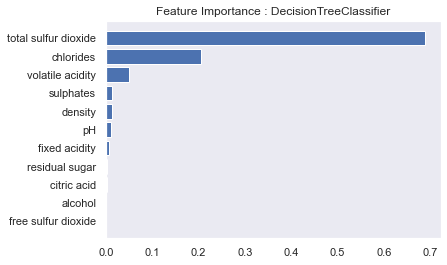

In [35]:
sorted_idx = DTC.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], DTC.feature_importances_[sorted_idx])
plt.title('Feature Importance : DecisionTreeClassifier');

We can see what features affected how our model predicted. From our previous analysis we can see that the features that varied more between the two classes were choosen. It is surprising thought that residual sugar was not such a great factor as I would have expected.

# Conclusion

Other models such as LogisticRegression or KNeighborsClassifier can be used as they perform really well.

The data can also be futher processed by transorming it to remove skewness and outliers for linear models.

Also the class imbalance can be fixed by using over or under sampling.